SYMBOL | BALANCE | POSITION |  P/L %  |
DUSKBTC    0.0153 		 1 	 53.0 %
MATICBTC    0.0139 		 0 	 39.0 %
IDEXBTC    0.0097 		 0 	 -3.0 %
SUPERBTC    0.0168 		 0 	 68.0 %
ASTBTC    0.015 		 0 	 50.0 %
LINABTC    0.0064 		 0 	 -36.0 %
SCRTBTC    0.0127 		 0 	 27.0 %
CELRBTC    0.0076 		 0 	 -24.0 %
QUICKBTC    0.0093 		 0 	 -7.0 %

WALLET:  0.1067 	P/L: 18.555556 %

WALLET:  0.10588 	P/L: 17.64 % - with FEEs and SLIPPAGE


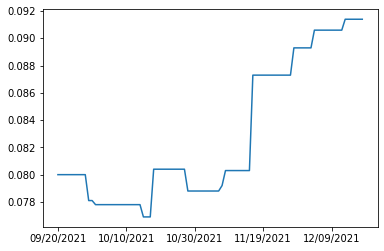

In [4]:
%run setup_moonlight.py

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
cat requirements.txt

aiodns==3.0.0
aiohttp==3.7.4.post0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///opt/concourse/worker/volumes/live/ce6e20ef-c449-4fb2-5463-03f67f4a0b31/volume/anaconda-client_1635342572171/work
anaconda-navigator==2.1.0
anyio @ file:///opt/concourse/worker/volumes/live/64740ac7-3a9c-4fbb-6685-a51c4ff8b4ca/volume/anyio_1617783319350/work/dist
appdirs==1.4.4
applaunchservices @ file:///Users/ktietz/demo/mc3/conda-bld/applaunchservices_1630511705208/work
appnope @ file:///opt/concourse/worker/volumes/live/5f13e5b3-5355-4541-5fc3-f08850c73cf9/volume/appnope_1606859448618/work
argh==0.26.2
argon2-cffi @ file:///opt/concourse/worker/volumes/live/d733ceb5-7f19-407b-7da7-a386540ab855/volume/argon2-cffi_1613037492998/work
arrow==0.13.1
astroid @ file:///opt/concourse/worker/volumes/live/269b33aa-309a-4844-4a47-1ea5675bedfd/volume/astroid_1628063146562/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
async-timeou

In [15]:
%load_ext watermark

%watermark -v -m -p pandas,binance

print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.29.0

pandas : 1.3.4
binance: 1.0.12

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

 
Last updated: Sat Dec 18 2021 18:48:08CET



In [9]:
import myBINANCE as bnc

In [13]:
from binance.client import Client